# Language analysis

### Eduardo G. Altmann, School of Mathematics and Statistics, Univ of Sydney
http://www.maths.usyd.edu.au/u/ega

### Complexity, Criticality and Computation (C3) Research Camp 2016
https://sydney.edu.au/complex-systems/events/c3camps/c3-2016.shtml

## Data

In [14]:
import sys,codecs,string
import numpy as np
import scipy as sp
from pylab import *
from collections import Counter
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

In [15]:
from matplotlib.pyplot import *

## List of words taken from books, as in my PNAS paper

Books from the Project Gutenberg: https://www.gutenberg.org/

Filtering and more details on data process, see: http://dx.doi.org/10.1073/pnas.1117723109

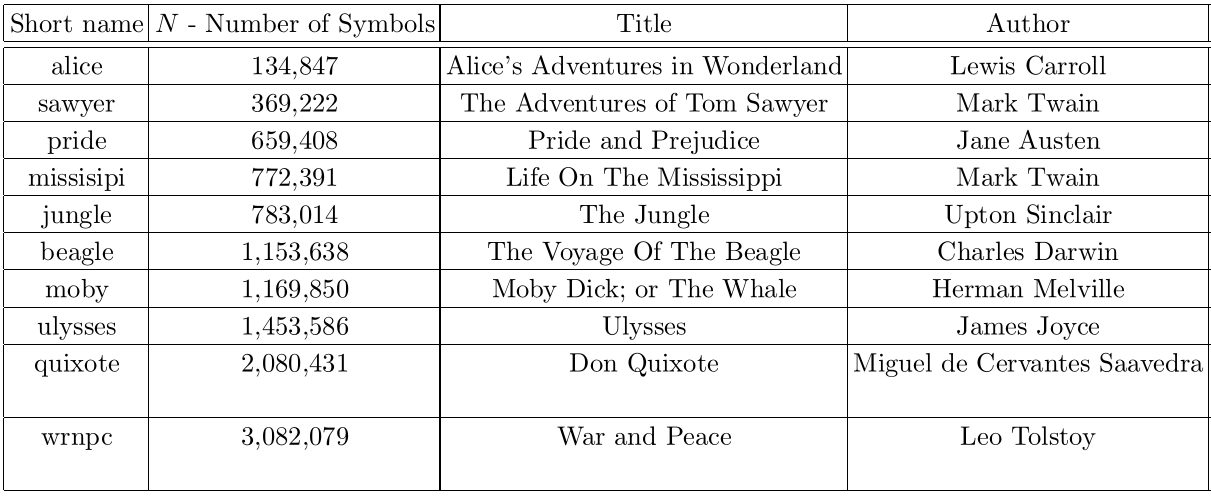

In [82]:
from IPython.display import Image
Image("data/books.png",width=900)

In [83]:
# import a book
#aliceC.txt   jungleC.txt     mobyC.txt   quixoteC.txt  ulyssesC.txt
#beagleC.txt  missisipiC.txt  prideC.txt  sawyerC.txt   wrnpcC.txt
f=open('data/wrnpcC.txt','r')
x=f.readline() # one string where words are separated by whitespace
f.close()
listWords = x.split() # list of words
#
# Alternative:``
#listWords=wrnpcWords.split()

In [84]:
x[:150]

'war and peace by leo tolstoy/tolstoi book one 1805 chapter i well prince so genoa and lucca are now just family estates of the buonapartes but i warn '

In [85]:
books=["aliceC.txt","sawyerC.txt","prideC.txt","missisipiC.txt","jungleC.txt","beagleC.txt","mobyC.txt","ulyssesC.txt","quixoteC.txt","wrnpcC.txt"]
texts=[]
for b in books:
    f=open('data/'+b,'r')
    x=f.readline()
    f.close()
    texts.append(x.split())

## Type-Tokens relation 

In [71]:
#Length of the book in word (tokens): 
len(listWords)

565161

In [72]:
#Length of the book in word (types):
len(set(listWords))

18062

In [86]:
print(" Book \t\t Tokens \t Types \t\t Ratio ")
ltypes=[]
ltokens=[]
for i,t in enumerate(texts):
    tokens=len(t)
    types=len(set(t))
    ltypes.append(types)
    ltokens.append(tokens)
    print("%s: \t %d   \t %d \t\t %.2f  "%(books[i][:9],tokens,types,float(types)/tokens))

 Book 		 Tokens 	 Types 		 Ratio 
aliceC.tx: 	 26667   	 2629 		 0.10  
sawyerC.t: 	 71180   	 7324 		 0.10  
prideC.tx: 	 122194   	 6412 		 0.05  
missisipi: 	 146786   	 12249 		 0.08  
jungleC.t: 	 151300   	 10105 		 0.07  
beagleC.t: 	 208375   	 12669 		 0.06  
mobyC.txt: 	 215939   	 17548 		 0.08  
ulyssesC.: 	 265304   	 29986 		 0.11  
quixoteC.: 	 402964   	 14876 		 0.04  
wrnpcC.tx: 	 565161   	 18062 		 0.03  


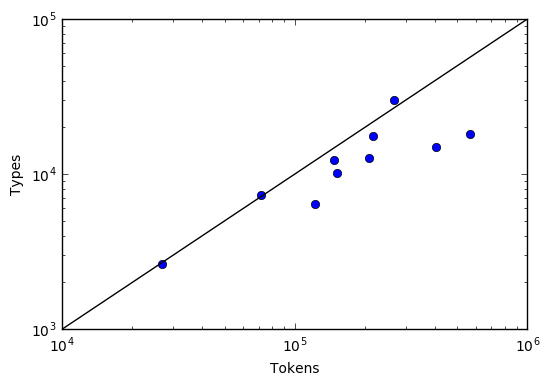

In [89]:
figure()
xscale("log")
yscale("log")
plot(ltokens,ltypes,"o")
plot([10000,1000000],[1000,100000],"-",color="black")
xlabel("Tokens")
ylabel("Types")
show()

## Zipf's Law

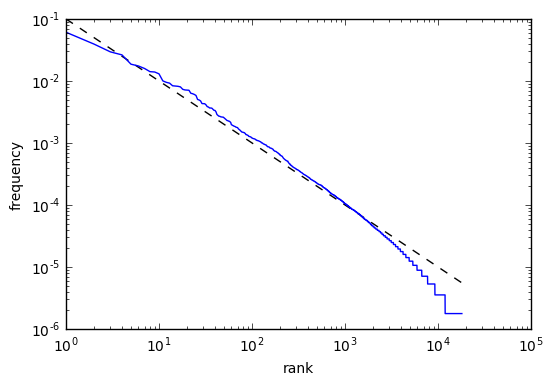

In [27]:
# count how often each word occurs
c = Counter(listWords) 
words=[]
counts=[]
for w,n in c.most_common():
    words += [w]
    counts += [n]
    
# rank-frequency distribution (r,Fr)
r = np.arange(len(counts))+1
Fr = np.array(counts)/float(sum(counts))

#Plotting scatter plot and mean
figure()
xscale("log")
yscale("log")
plot(r,0.1/r,"--",color="black")
plot(r,Fr,"g",color="blue")
xlabel("rank")
ylabel("frequency")
show()

## Heaps' Law

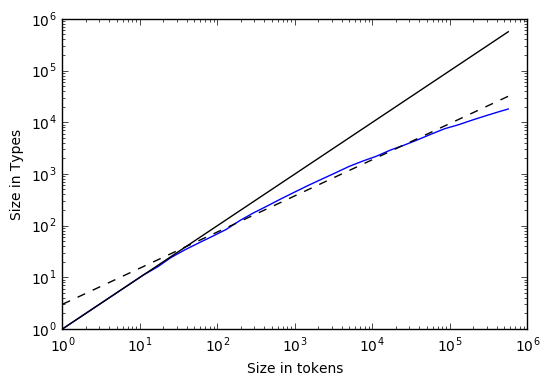

In [28]:
#Define the points to measure Heaps law
x=1
pts=[]
i=2
while x<len(listWords):
    pts.append(x)
    x=int(pow(1.5,i))
    i+=1
pts.append(len(listWords))

sizeV=[]
for j in pts:
    sizeV.append(len(set(listWords[:j])))
    
    #Plotting scatter plot and mean
figure()
xscale("log")
yscale("log")
plot(pts,sizeV,"g",color="blue")
plot(pts,pts,"-",color="black")
plot(np.array(pts),3*pow(np.array(pts),0.7),"--",color="black")
xlabel("Size in tokens")
ylabel("Size in Types")
show()